# **Task 1 – Posing a thought-provoking analytical query pertinent to the selected dataset (LO1)**     


Within the field of medicine, the Diabetes Dataset provides a wealth of data about women who have been evaluated medically for diabetes and who are at least 21 years of age. Every piece of data that adds to a complete picture of diabetes susceptibility is valuable, ranging from the total number of pregnancies to blood pressure, skin thickness, insulin metrics, BMI, diabetes genetics, and age demographics. In order to create customised preventative plans and provide proactive patient care, healthcare professionals can get essential insights by understanding the complex relationships between these variables and working towards a healthier future.


The analytical question for this reseach is thus as follows: How much do blood pressure, BMI, insulin levels, glucose, age, skin thickness, number of pregnancies, and diabetic pedigree function affect the likelihood of acquiring diabetes?


To answer this question, we will rely on the Healthcare Diabetes dataset for further analysis.

The existence of this disease brought about the use of technology to help predict traces of diabetics by using diabetes data gathered from this link https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes

Understanding the provided data by investigating its characteristics and dependencies is my main goal. The dataset's attributes contain information about issues linked to diabetes, so I want to find important patterns and relationships between them. Assess which characteristics—such as blood sugar levels, body mass index, etc.—have the biggest impact on the likelihood that someone would acquire diabetes.
Additionally, create a model that can swiftly diagnose patients and potentially save lives by accurately predicting the presence of diabetes with a 95% or higher accuracy rate.


# **Task 2.1 – Data pre-processing (LO2)**

The first step is to load our dataset "Healthcare-Diabetes.csv'. We downloaded this dataset from Kaggle. To upload our dataset to google colab, we used the files.upload() function which prompts us to select files from our local drive.
Once we have selected our Healthcare-Diabetes.csv file, it will be automatically transferred to google colab allowing us to access and work directly with the dataset in our Python code.

Next, necessary libraries were imported for our data analysis and modelling

The CSV file, "Healthcare-Diabetes.csv," is then read and loaded into a DataFrame using the pandas package.

Finally, we show the dataset's first five rows and last five rows in a DataFrame. This will make it possible to quickly scan the contents of our dataset. This will enable us to have a quick overview of the values and format of the dataset.


# Extracting file into google colab

In [ ]:
# Extracting file into google colab
from google.colab import files
uploaded = files.upload()

Saving Healthcare-Diabetes.csv to Healthcare-Diabetes (5).csv


# Importing Necessary Libraries needed for our data analysis and modelling

In [ ]:
#Importing Necessary Libraries needed for our data analysis and modelling
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn. preprocessing import MinMaxScaler
from sklearn.metrics import precision_score,confusion_matrix,recall_score,  accuracy_score, f1_score,  ConfusionMatrixDisplay
from sklearn.naive_bayes import BernoulliNB, CategoricalNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Import Dataset(/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv)


In [ ]:
df_data = pd.read_csv('Healthcare-Diabetes.csv')
print(df_data.head())
print(df_data.tail())

   Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0   1            6      148             72             35        0  33.6   
1   2            1       85             66             29        0  26.6   
2   3            8      183             64              0        0  23.3   
3   4            1       89             66             23       94  28.1   
4   5            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
        Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2763  2764            2       75             64             24       55  29.7   
2764  2765            8      179             72             42      130  32.7   
2765  2766            6       85    

In [ ]:
# Checking the dimensions of our dataset to understand the size of our dataset
df_data.shape

(2768, 10)

There are 10 columns and 2768 rows in the dataset. This large row dataset is selected because the larger the dataset the more accurate the prediction.

# Healthcare-Diabetes Data Dictionary
 This is useful in understanding these medical terminologies to enhance our understanding of our dataset so we can analyse it properly especially for persons from a non tech or non medical background

1. DiabetesPedigreeFunction: genetic result of diabetes,This calculates diabetes likelihood depending on the person's age and family history of diabetes.
2. Age: in Years.
3. Outcome: indication of diabetes presence in 1 or 0
4. Id: Unique identifier for each of the entry.
5. Pregnancies: pregnancy occurrence number, the higher the number of occurrence the worse the level of diabetes
6. Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test, higher glucose level is a major contributor to diabetes
7. BloodPressure: Diastolic bp (mm Hg),individuals with high blood pressure usually have insulin resistance and an increased chances of diagnosed with diabetes compared to those with normal blood pressure.
8. SkinThickness: thickness of Triceps skinfold (mm), The direct cause or risk factor for diabetes is majorly not considered to be the thickness of the skin. These changes may intercept skin thickness because of other factors like age and exposure to environment factors, but they do not play a significant role in the development of diabetes disease.
9. Insulin: 2-Hour serum insulin (mu U/ml), Insulin allows blood sugar to enter the cells of the body, which is needed for energy. Insulin also stimulates the liver's storage of blood sugar, which may be used later. The sugar in the blood enters the cells, and the level of insulin in the blood decreases, which signals the decrease in insulin.
10. BMI: Measure in weight in kg / height in m^2, The risk of type 2 diabetes may be increased in a linear manner with the increasing body mass index due to excess body fat accumulation.



# Clean and explore Data

After reviewing our dataset, we found that it has 2 qualitative variables, "Age" and "Outcome," in addition to 7 quantitative features: "Pregnancies," "Glucose," "BloodPressure," "SkinThickness," "Insulin," and "BMI." The "ID" feature will soon be eliminated as it is not important to our analysis. The summary statistics and distribution of our data is shown to enhance our understanding

In [ ]:
# Selecting all the quantitative columns
quantitative_cols = ["Pregnancies","Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction"]

df_data[quantitative_cols].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000


In [ ]:
#summary statistics of our data
df_data.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


# Oberservation from data statistics

 1. The records contains only quantitative values and categorical values
 2. 4 attributes of the data have high variance
 3. The minimum values for Glucose, BloodPressure, SkinThickness, Insulin, and BMI are all recorded as 0. Such values are typically unattainable for physiological measures, suggesting they may represent missing or erroneous data. The presence of these zeros could distort the overall data distribution
 4. the data only has numeric values




In [ ]:
# Overview of Data: Types and Structure
df_data.info

<bound method DataFrame.info of         Id  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0        1            6      148             72             35        0  33.6   
1        2            1       85             66             29        0  26.6   
2        3            8      183             64              0        0  23.3   
3        4            1       89             66             23       94  28.1   
4        5            0      137             40             35      168  43.1   
...    ...          ...      ...            ...            ...      ...   ...   
2763  2764            2       75             64             24       55  29.7   
2764  2765            8      179             72             42      130  32.7   
2765  2766            6       85             78              0        0  31.2   
2766  2767            0      129            110             46      130  67.1   
2767  2768            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.627   50        1  
1                        0.351   31        0  
2                        0.672   32        1  
3                        0.167   21        0  
4                        2.288   33        1  
...                        ...  ...      ...  
2763                     0.370   33        0  
2764                     0.719   36        1  
2765                     0.382   42        0  
2766                     0.319   26        1  
2767                     0.547   25        0  

[2768 rows x 10 columns]>

We need to check for duplicates and NA in the dataset as this is part of cleaning process

In [ ]:
# observing null values and duplicates
print(df_data.isna().sum())
print("")
print("number of duplicates rows = ",df_data.duplicated().sum())

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

number of duplicates rows =  0


from the data, we do not have any missing data, and any duplicated rows in our data.

In [ ]:
#Making a DataFrame Copy: Safeguarding Original Data
data = df_data.copy()
# drop irrelevant column that is useful to our analysis
data.drop('Id', axis=1, inplace=True)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#I intend to substitute the zero values for the minimum values in the data summary statistics with the median value of each column
col_sub = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df_data[col_sub] = df_data[col_sub].replace(0, np.nan) # Initially, I will replace zero values with nulls and then compute the median
df_data_median = df_data[col_sub].median()    # computing the median
df_data[col_sub] = df_data[col_sub].fillna(df_data_median) # filling the null values in the col_sub with the corresponding values from the df_data_median series

In [ ]:
df_data[quantitative_cols].describe() # Verifying that the min values have been substituted with the median values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.863439,72.385838,29.205925,140.669798,32.593895,0.471193
std,3.323801,30.503499,11.988549,9.032220,82.887979,7.103462,0.325669
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000
25%,1.000000,99.000000,64.000000,25.000000,120.000000,27.575000,0.244000
50%,3.000000,117.000000,72.000000,29.000000,126.000000,32.400000,0.375000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000


In [ ]:
#Dropping relevant column for further analysis
df_data.drop('Id', axis=1, inplace=True)

Now let check for the following
1. Outlier
2. Distribution of each atrributes to understand the behaviour of the each column

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Explanation** : For different attributes in a dataset, the code  below produces paired visualizations (boxplots and histograms). Plots such as "Pregnancies," "Glucose," "Blood Pressure," "Skin Thickness," "Insulin," "BMI," "Diabetes Pedigree Function," "Age," and "Outcome" are displayed in each pair to illustrate the distribution and frequency of various features.

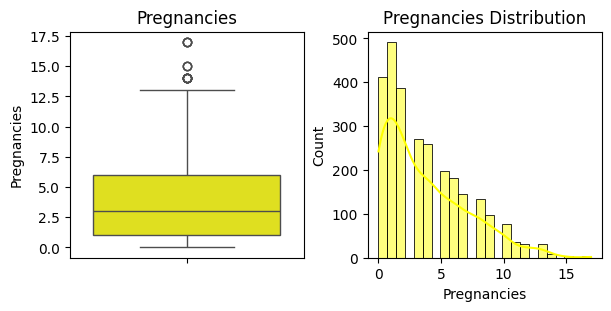

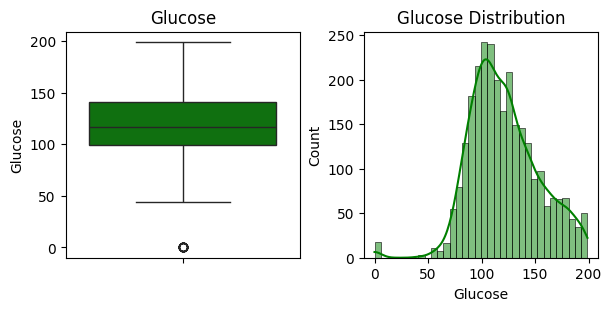

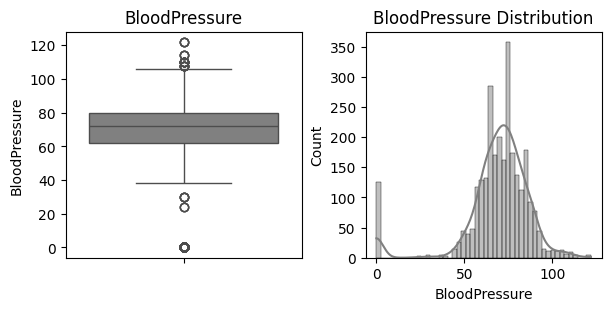

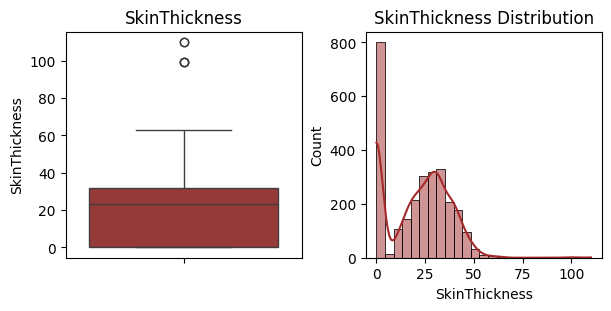

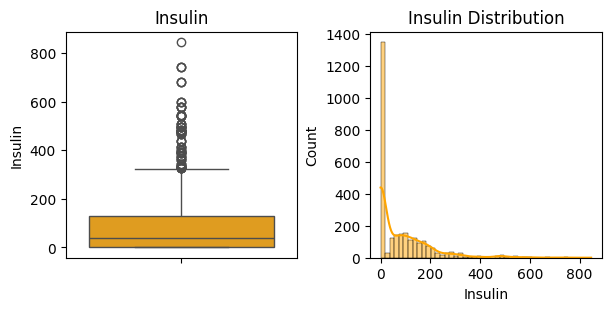

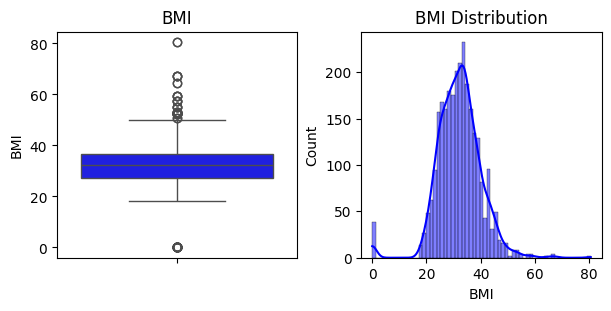

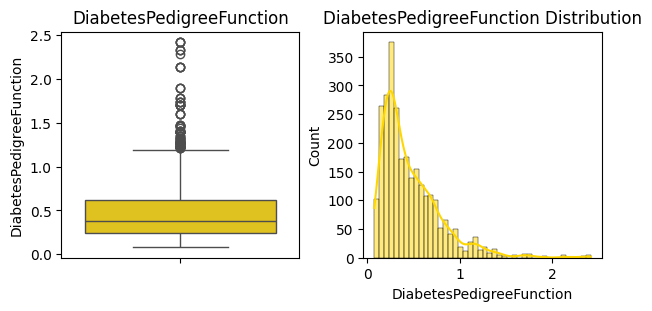

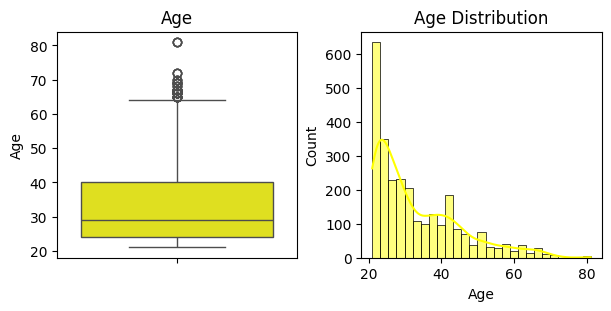

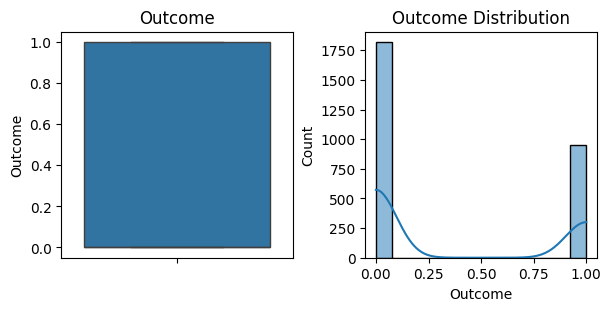

In [ ]:
fig, axs = plt.subplots(1,2, figsize = (6,3), constrained_layout=True)
sns.boxplot(data["Pregnancies"], ax= axs[0],color ="yellow").set_title("Pregnancies")
sns.histplot(data["Pregnancies"], ax= axs[1], color ="yellow", kde=True).set_title("Pregnancies Distribution")

plt.show()
fig, axs = plt.subplots(1,2, figsize = (6,3), constrained_layout=True)
sns.boxplot(data["Glucose"], ax= axs[0],color ="green").set_title("Glucose")
sns.histplot(data["Glucose"], ax= axs[1],color ="green",kde=True).set_title("Glucose Distribution")
plt.show()
fig, axs = plt.subplots(1,2, figsize = (6,3), constrained_layout=True)
sns.boxplot(data["BloodPressure"], ax= axs[0],color ="grey").set_title("BloodPressure")
sns.histplot(data["BloodPressure"], ax= axs[1],color ="grey",kde=True).set_title("BloodPressure Distribution")
plt.show()
fig, axs = plt.subplots(1,2, figsize = (6,3), constrained_layout=True)
sns.boxplot(data["SkinThickness"], ax= axs[0],color ="brown").set_title("SkinThickness")
sns.histplot(data["SkinThickness"], ax= axs[1],color ="brown",kde=True).set_title("SkinThickness Distribution")
plt.show()
fig, axs = plt.subplots(1,2, figsize = (6,3), constrained_layout=True)
sns.boxplot(data["Insulin"], ax= axs[0],color ="orange").set_title("Insulin")
sns.histplot(data["Insulin"], ax= axs[1],color ="orange",kde=True).set_title("Insulin Distribution")
plt.show()
fig, axs = plt.subplots(1,2, figsize = (6,3), constrained_layout=True)
sns.boxplot(data["BMI"], ax= axs[0],color ="blue").set_title("BMI")
sns.histplot(data["BMI"], ax= axs[1],color ="blue",kde=True).set_title("BMI Distribution")
plt.show()
fig, axs = plt.subplots(1,2, figsize = (6,3), constrained_layout=True)
sns.boxplot(data["DiabetesPedigreeFunction"], ax= axs[0],color ="gold").set_title("DiabetesPedigreeFunction")
sns.histplot(data["DiabetesPedigreeFunction"], ax= axs[1],color ="gold",kde=True).set_title("DiabetesPedigreeFunction Distribution")
plt.show()
fig, axs = plt.subplots(1,2, figsize = (6,3), constrained_layout=True)
sns.boxplot(data["Age"], ax= axs[0],color ="yellow").set_title("Age")
sns.histplot(data["Age"], ax= axs[1],color ="yellow",kde=True).set_title("Age Distribution")
plt.show()
fig, axs = plt.subplots(1,2, figsize = (6,3), constrained_layout=True)
sns.boxplot(data["Outcome"], ax= axs[0]).set_title("Outcome")
sns.histplot(data["Outcome"], ax= axs[1],kde=True).set_title("Outcome Distribution")
plt.show()

From the graph above, all features have outliers, so we will remove all outliers which will reduce the data

It's apparent that the majority of variables exhibit normally distributed data, with a few showing left-skewed distributions. The skewed data in the 'Pregnancies' variable is understandable, given that it's more common for women to have 2 or 3 pregnancies than 8

**Explanation** : making use of quartile-based analysis to find and eliminate outliers in the 'BMI' column. Following outlier removal, the 'BMI' distribution is then visualized.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(2768, 9)


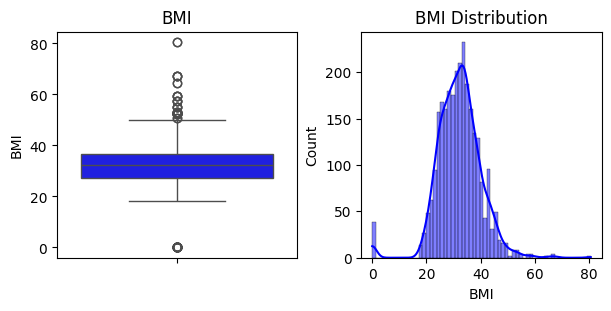

In [ ]:
quantile_1 = data['BMI'].quantile(.25)
quantile_2 = data['BMI'].quantile(0.75)
diff = quantile_2 - quantile_1
l_quantile = quantile_1 - (diff * 1.5)
l_arr = np.where(data['BMI'] <= l_quantile)[0]
data.drop(index=l_arr).reset_index(inplace = True)
print(data.head())
print(data.shape)

fig, axs = plt.subplots(1,2, figsize = (6,3), constrained_layout=True)
sns.boxplot(data["BMI"], ax= axs[0],color ="blue").set_title("BMI")
sns.histplot(data["BMI"], ax= axs[1],color ="blue", kde=True).set_title("BMI Distribution")
plt.show()

From the histogram above, you will see that the outliers in the lower quartile in BMI has been removed

**Explanation** : Determining the interquartile range (IQR) and quartiles for the 'Glucose' column, using the IQR to eliminate outliers. The original records and shape of the updated dataset are then shown. Furthermore, although it isn't used in the current script, there is commented-out code for displaying the distribution of the 'Glucose' column using a boxplot and histogram.

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


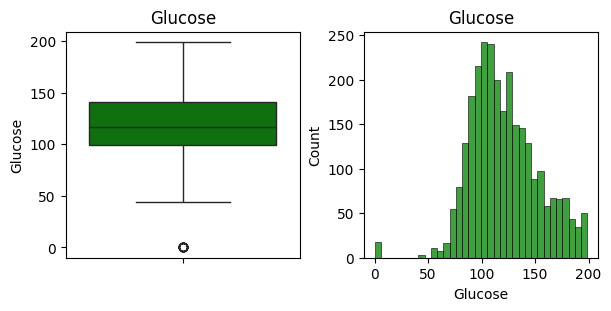

In [ ]:
quantile_1 = data['Glucose'].quantile(.25)
quantile_2 = data['Glucose'].quantile(0.75)
diff = quantile_2 - quantile_1
l_quantile = quantile_1 - (diff * 1.5)
l_arra = np.where(data['Glucose'] <= l_quantile)[0]
data.drop(index=l_arra).reset_index(inplace = True)
print(data.head())
data.shape

fig, axs = plt.subplots(1,2, figsize = (6,3), constrained_layout=True)
sns.boxplot(data["Glucose"], ax= axs[0],color ="green").set_title("Glucose")
sns.histplot(data["Glucose"], ax= axs[1],color ="green").set_title("Glucose")
plt.show()

**Explanation** : same analysis done for Bloodpressure below

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(2768, 9)


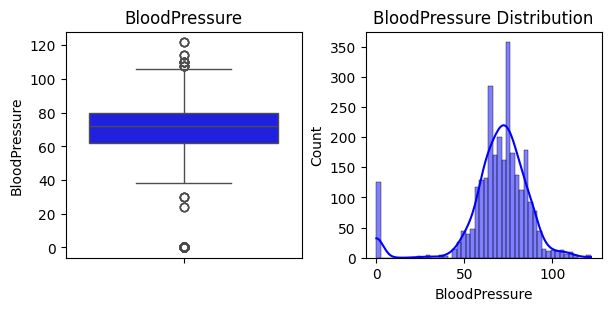

In [ ]:
quantile_1 = data['BloodPressure'].quantile(.25)
quantile_2 = data['BloodPressure'].quantile(0.75)
diff = quantile_2 - quantile_1
l_quantile = quantile_1 - (diff * 1.5)
l_arr = np.where(data['BloodPressure'] <= l_quantile)[0]
data.drop(index=l_arr).reset_index(inplace = True)
print(data.head())
print(data.shape)
fig, axs = plt.subplots(1,2, figsize = (6,3), constrained_layout=True)
sns.boxplot(data["BloodPressure"], ax= axs[0],color ="blue").set_title("BloodPressure")
sns.histplot(data["BloodPressure"], ax= axs[1],color ="blue", kde=True).set_title("BloodPressure Distribution")
plt.show()

I've generated plots below illustrating the relationship between each feature and the average diabetic outcome, representing the mean of the outcome for specific bins of each column.
This approach enables me to discern patterns regarding the likelihood of diabetes across the range of values for each feature.

In [ ]:
df_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,126.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,126.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,126.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


# **Task 2.2 – Exploratory data analysis (LO1, LO2)**

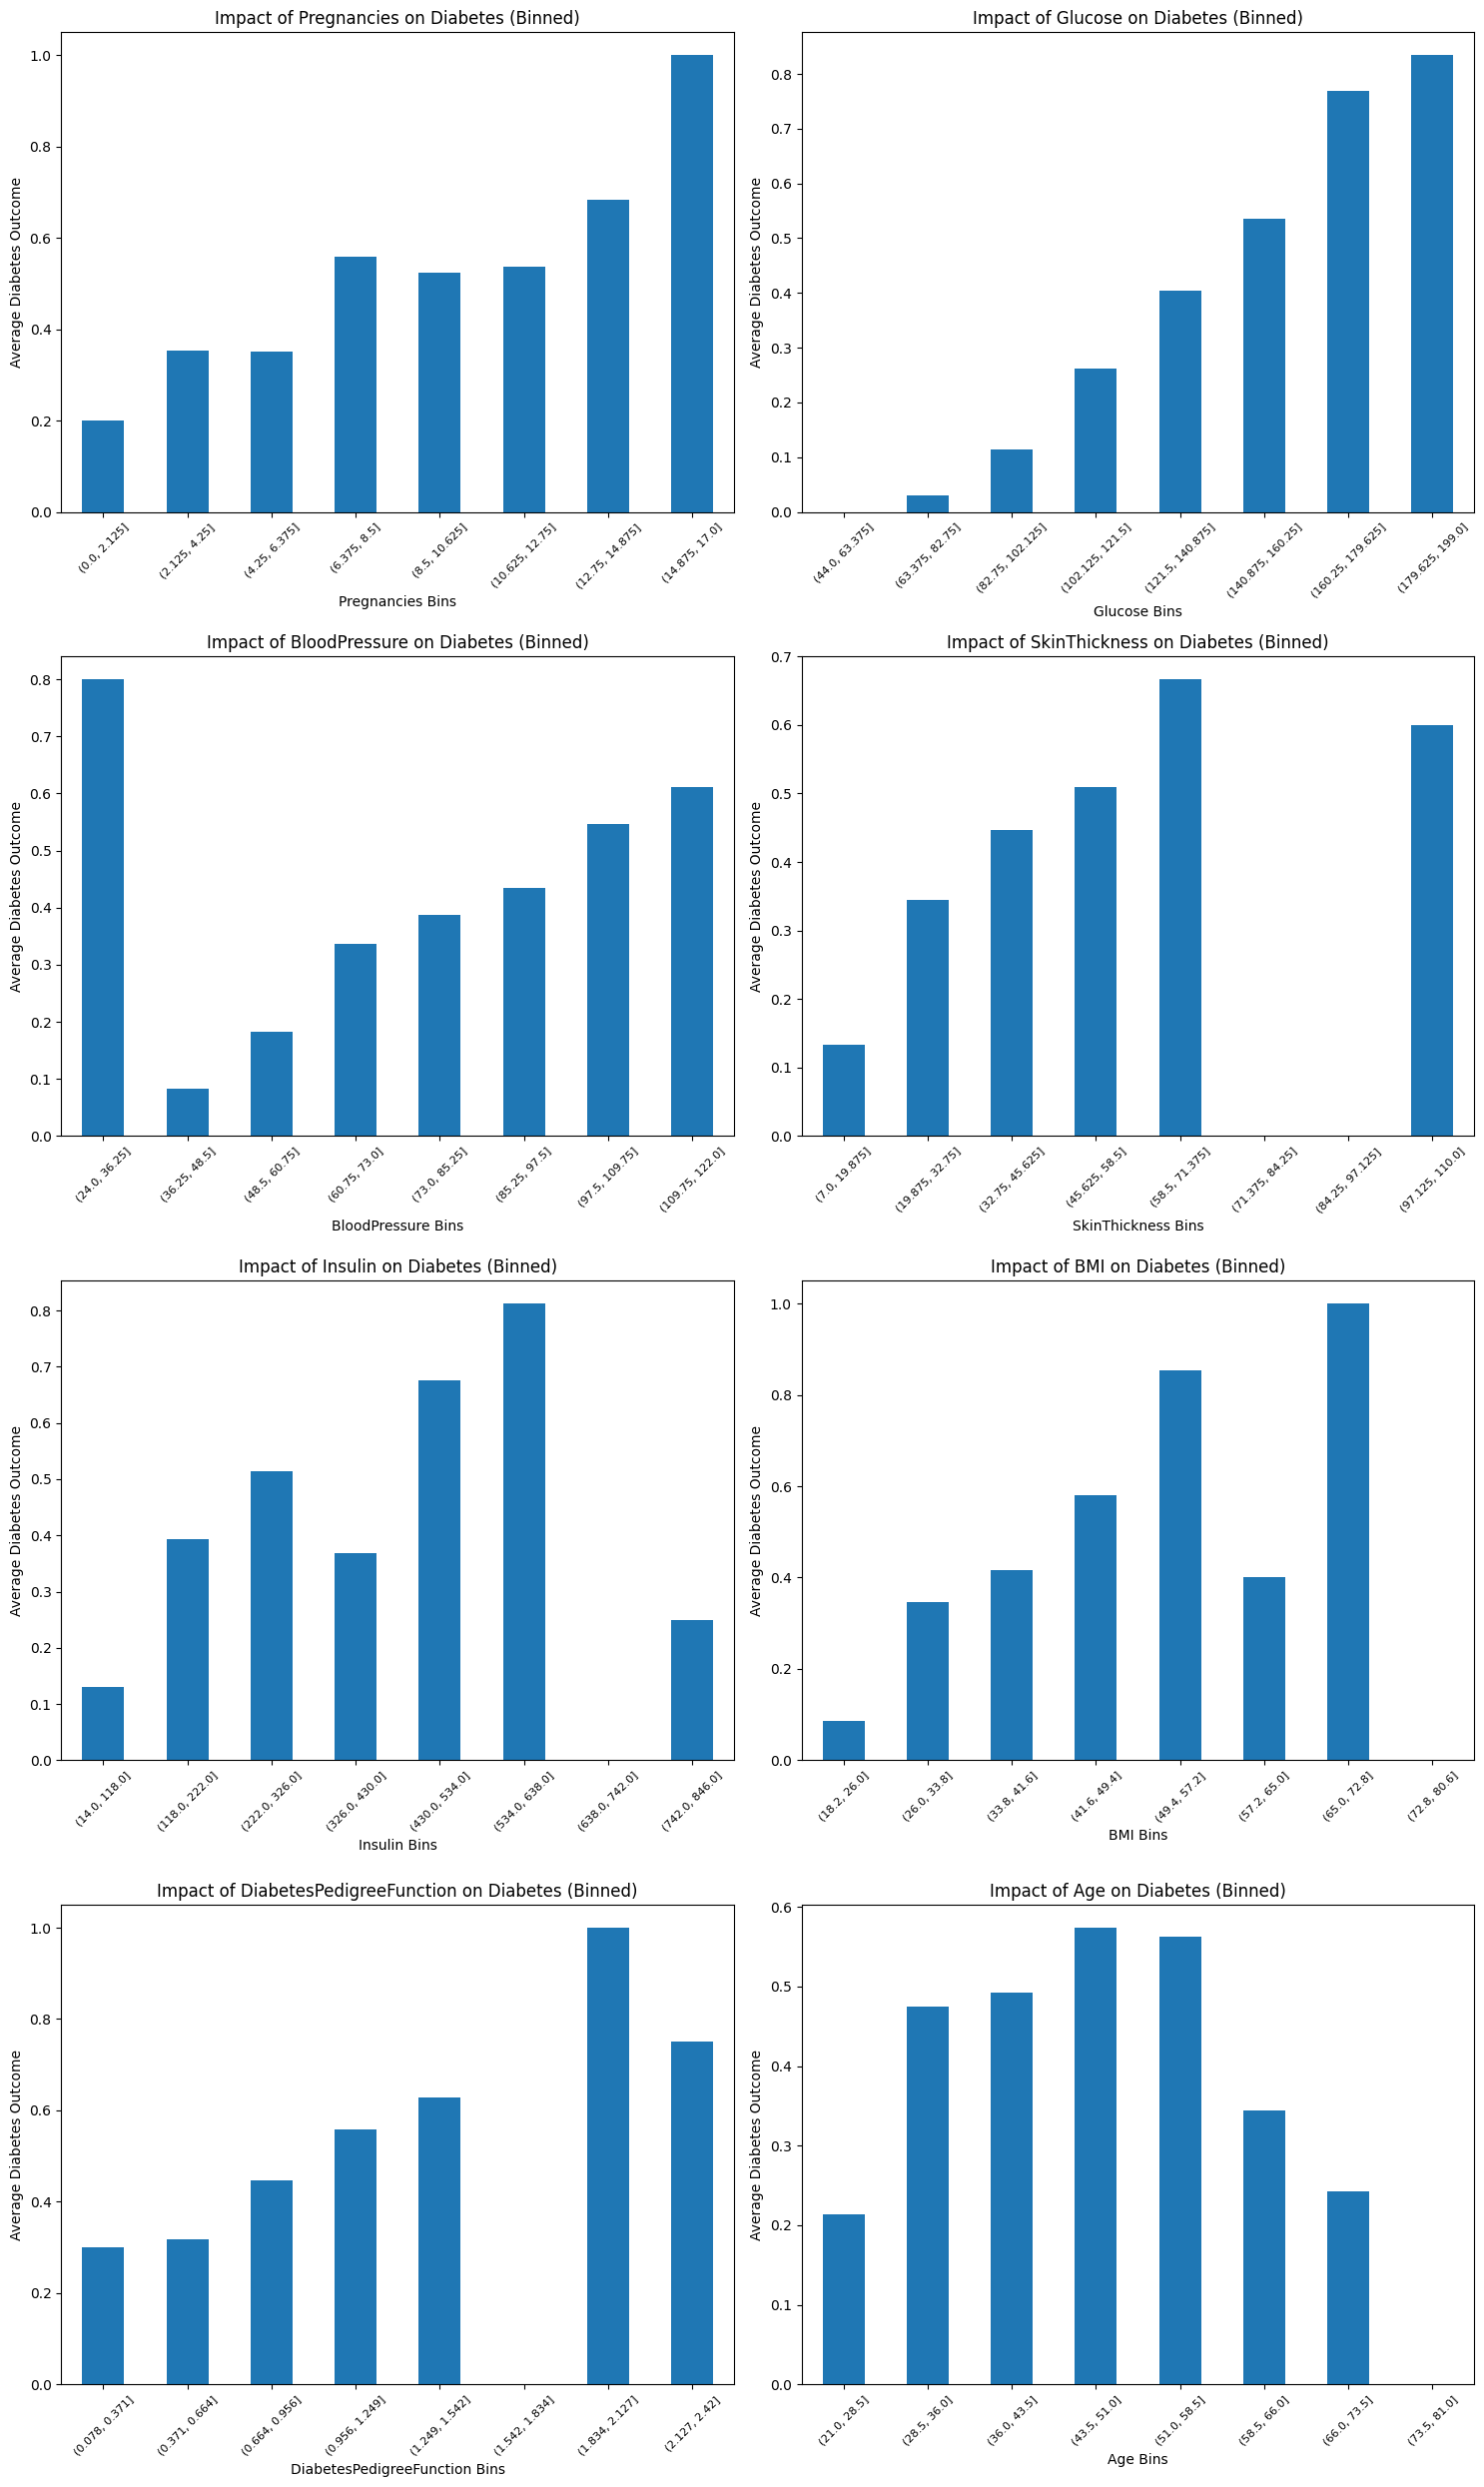

In [ ]:
#What effect does an increase in feature value have on a person's likelihood of developing diabetes? Lets find out

columns_to_plot = df_data.columns[(df_data.columns != 'AgeGroup') & (df_data.columns != 'Outcome')]

# Specify the number of bins
num_bins = 8
fig, axes = plt.subplots(4, 2, figsize=(15, 25))
axes = axes.flatten()

# Loop through columns and create binned bar plots
for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    bins = np.linspace(df_data[col].min(), df_data[col].max(), num_bins + 1)
    df_data.groupby(pd.cut(df_data[col], bins))['Outcome'].mean().plot(kind='bar', ax=ax, title=f'Impact of {col} on Diabetes (Binned)')
    ax.set_xlabel(f'{col} Bins'), ax.set_ylabel('Average Diabetes Outcome'), ax.tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

**Observation from the binned bar plots** : The depicted graphs demonstrate a consistent trend: as each feature's value rises, so does the likelihood of diabetes. However, an exception is observed with Bloodpressure, where exceptionally low levels also correlate with higher diabetes risk.

**Lets look at our outcome below to know the percentage with diabetes**

In [ ]:
data['Outcome']

0       1
1       0
2       1
3       0
4       1
       ..
2763    0
2764    1
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64

Text(0.5, 1.0, 'target')

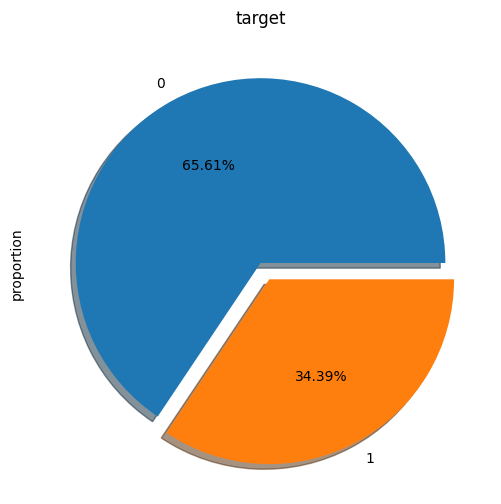

In [ ]:
outcome_count = data['Outcome'].value_counts(normalize = True)
f,ax=plt.subplots(figsize=(10,6))
outcome_count.plot.pie(explode=[0,0.1],autopct='%1.2f%%',shadow=True).set_title('target')

From out pie chart 65.61% of the outcome is non diabetic and 34.39% are diabetic.
we will now check if the extreme quantitative values are more likely to have diabetes.

Text(0, 0.5, 'DiabetesPedigreeFunction')

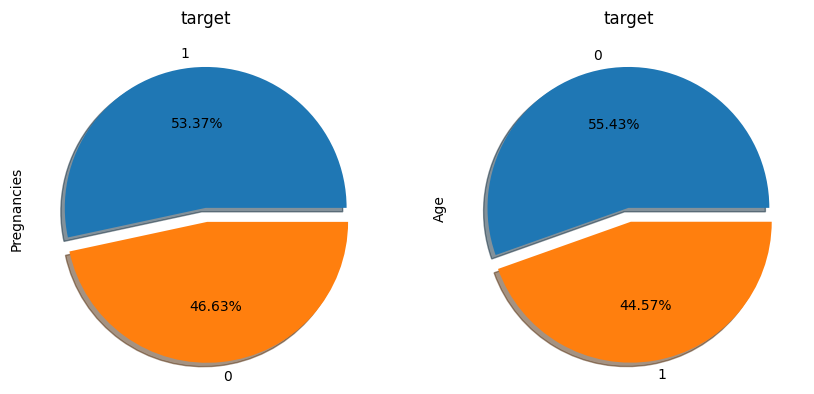

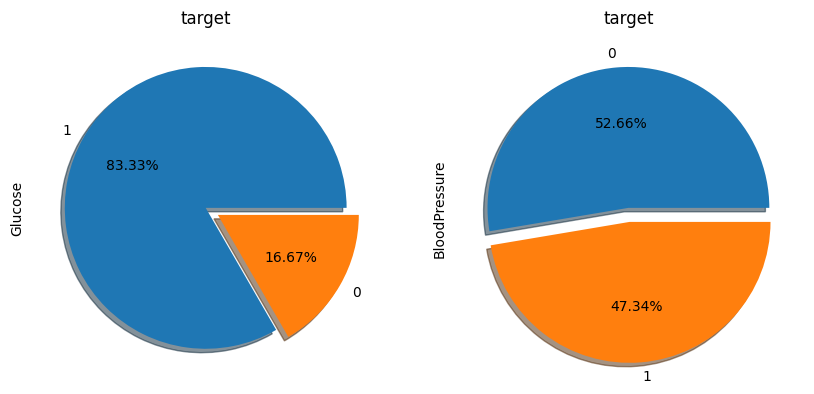

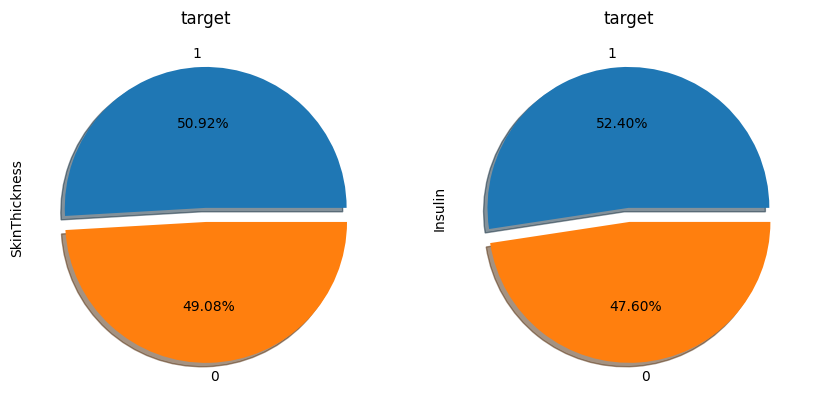

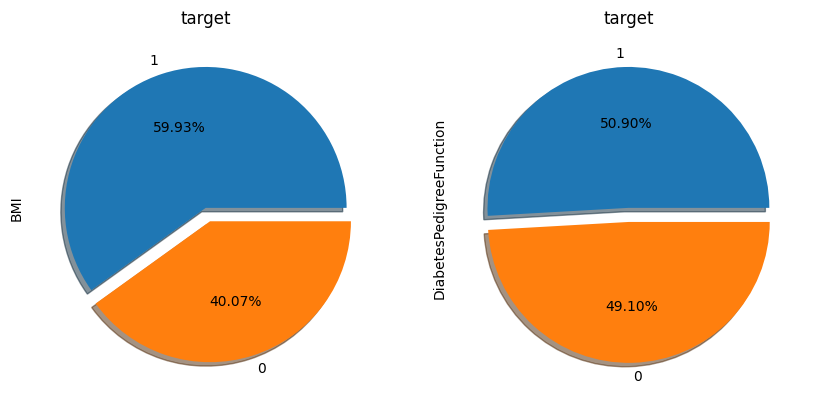

In [ ]:
is_diabetic = data[data['Pregnancies'] > np.percentile(data['Pregnancies'], 90)]
outcome_count = is_diabetic['Outcome'].value_counts(normalize = True)
f,axs=plt.subplots(1,2,figsize=(10,6))
outcome_count.plot.pie(explode=[0,0.1],ax=axs[0],autopct='%1.2f%%',shadow=True).set_title('target')
axs[0].set_ylabel("Pregnancies")

is_diabetic = data[data['Age'] > np.percentile(data['Age'], 90)]
outcome_count = is_diabetic['Outcome'].value_counts(normalize = True)
outcome_count.plot.pie(explode=[0,0.1],ax=axs[1],autopct='%1.2f%%',shadow=True).set_title('target')
axs[1].set_ylabel("Age")

is_diabetic = data[data['Glucose'] > np.percentile(data['Glucose'], 90)]
outcome_count = is_diabetic['Outcome'].value_counts(normalize = True)
f,axs=plt.subplots(1,2,figsize=(10,6))
outcome_count.plot.pie(explode=[0,0.1],ax=axs[0],autopct='%1.2f%%',shadow=True).set_title('target')
axs[0].set_ylabel("Glucose")

is_diabetic = data[data['BloodPressure'] > np.percentile(data['BloodPressure'], 90)]
outcome_count = is_diabetic['Outcome'].value_counts(normalize = True)
outcome_count.plot.pie(explode=[0,0.1],ax=axs[1],autopct='%1.2f%%',shadow=True).set_title('target')
axs[1].set_ylabel("BloodPressure")

is_diabetic = data[data['SkinThickness'] > np.percentile(data['SkinThickness'], 90)]
outcome_count = is_diabetic['Outcome'].value_counts(normalize = True)
f,axs=plt.subplots(1,2,figsize=(10,6))
outcome_count.plot.pie(explode=[0,0.1],ax=axs[0],autopct='%1.2f%%',shadow=True).set_title('target')
axs[0].set_ylabel("SkinThickness")

is_diabetic = data[data['Insulin'] > np.percentile(data['Insulin'], 90)]
outcome_count = is_diabetic['Outcome'].value_counts(normalize = True)
outcome_count.plot.pie(explode=[0,0.1],ax=axs[1],autopct='%1.2f%%',shadow=True).set_title('target')
axs[1].set_ylabel("Insulin")

is_diabetic = data[data['BMI'] > np.percentile(data['BMI'], 90)]
outcome_count = is_diabetic['Outcome'].value_counts(normalize = True)
f,axs=plt.subplots(1,2,figsize=(10,6))
outcome_count.plot.pie(explode=[0,0.1],ax=axs[0],autopct='%1.2f%%',shadow=True).set_title('target')
axs[0].set_ylabel("BMI")

is_diabetic = data[data['DiabetesPedigreeFunction'] > np.percentile(data['DiabetesPedigreeFunction'], 90)]
outcome_count = is_diabetic['Outcome'].value_counts(normalize = True)
outcome_count.plot.pie(explode=[0,0.1],ax=axs[1],autopct='%1.2f%%',shadow=True).set_title('target')
axs[1].set_ylabel("DiabetesPedigreeFunction")


**Observation for pregnancies piechart** : From the pregnancies piechart, approximately 53.37% of individuals exhibiting increased pregnancies levels demonstrate a propensity toward diabetes, whereas 46.63% of those with increased pregnancies exhibit a disposition toward non-diabetic states. From the top 10% of data values in the distribution of individuals with higher number of pregnancies,there seem to be a balanced distribution between individuals with higher pregnancies being diabetic and non-diabetic.

**Observation for glucose piechart** : From the glucose piechart, approximately 83.33% of individuals with high sugar levels show a tendency for diabetes, whereas 16.67% of those with increased sugar levels show a tendency for diabetes. This indicates that a larger proportion of individuals with elevated sugar levels are likely to have diabetes. As sugar levels increase, so does the likelihood of having diabetes.

 **Lets now get the correlation among all the columns or attributes in the data using heatmap**

<Axes: >

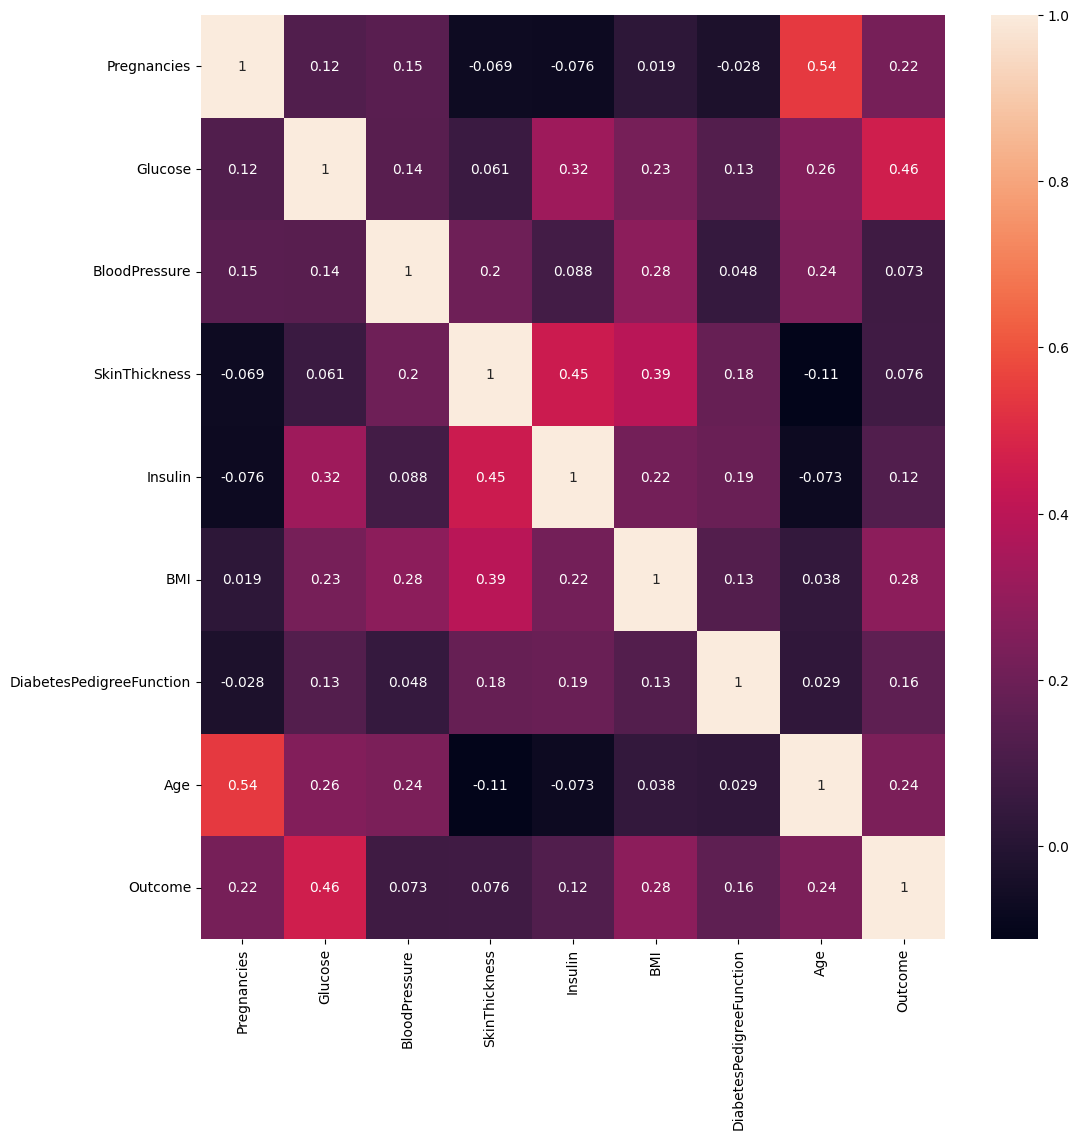

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot = True)

**Seeing the attributes above showing information like Age: 0.24, Glucose: 0.46, BMI: 0.28,  and Pregnancies: 0.22 displays a high correlation with diabetes compared to other attributes, signifying they are potential contributors. Also with Insulin: 0.12, DiabetesPedigreeFunction: 0.16 and SkinThickness: 0.076 shows some correlation.**

**However, others do not appear to have any correlation so they will be removed from the data as they are not needing for prediction and further analysis**

In [ ]:
data.describe

<bound method NDFrame.describe of       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
4               0      137             40             35      168  43.1   
...           ...      ...            ...            ...      ...   ...   
2763            2       75             64             24       55  29.7   
2764            8      179             72             42      130  32.7   
2765            6       85             78              0        0  31.2   
2766            0      129            110             46      130  67.1   
2767            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  Outcome  
0                        0.627   50        1  
1                        0.351   31        0  
2                        0.672   32        1  
3                        0.167   21        0  
4                        2.288   33        1  
...                        ...  ...      ...  
2763                     0.370   33        0  
2764                     0.719   36        1  
2765                     0.382   42        0  
2766                     0.319   26        1  
2767                     0.547   25        0  

[2768 rows x 9 columns]>

**Observation from heatmap for further analysis** : It is clear from the correlation research and visualisations that the chance of developing diabetes rises with each feature's value. From the heatmap, DiabetesPedigreeFunction has a weaker correlation with outcomes than other variables, while BloodPressure is not a very important factor in diabetes risk. Furthermore, Age Group is thought to be less valuable for analysis due to its qualitative nature and broad age range. I'll concentrate my further study on pregnancy, glucose, and BMI because these variables have high relationships with each other, as well as with skin thickness to BMI and glucose to insulin since they are well correlated.'

To determine if a person has diabetes or not, I will compute the average value of the attributes for outcomes 1 and 0 below.

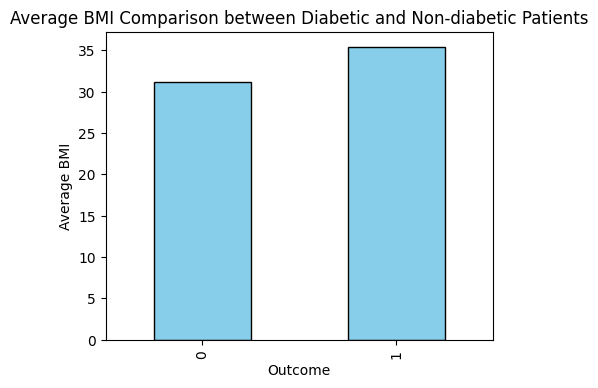

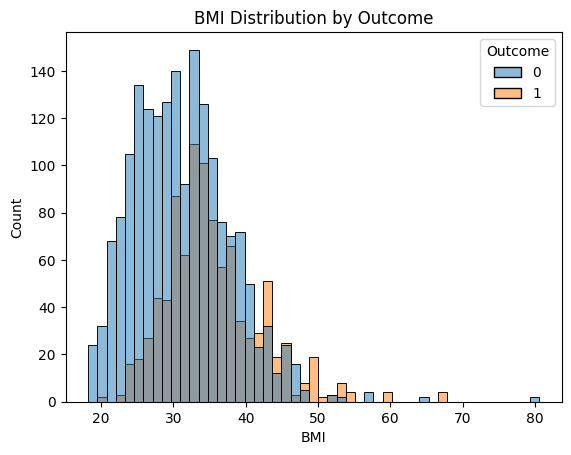

In [ ]:
# Analyzing BMI further
plt.figure(figsize=(5,4))
average_bmi = df_data.groupby('Outcome')['BMI'].mean().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average BMI Comparison between Diabetic and Non-diabetic Patients')
plt.xlabel('Outcome')
plt.ylabel('Average BMI')
plt.show()

sns.histplot(data=df_data, x="BMI", hue='Outcome', color='blue', edgecolor='black')
plt.xlabel("BMI")
plt.ylabel("Count")
plt.title("BMI Distribution by Outcome")
plt.show()

**Observation from BMI Distribution** : The likelihood of diabetes and non-diabetic states appears to be slightly balanced, as shown by the bar plot. The average for outcomes labelled '1' is considerably positioned to the right of the average for outcomes labelled '0' in the histogram plot. It appears from this change that, with rare exceptions, having a higher BMI increases the risk of developing diabetes, whereas having a lower BMI does not carry the same danger.


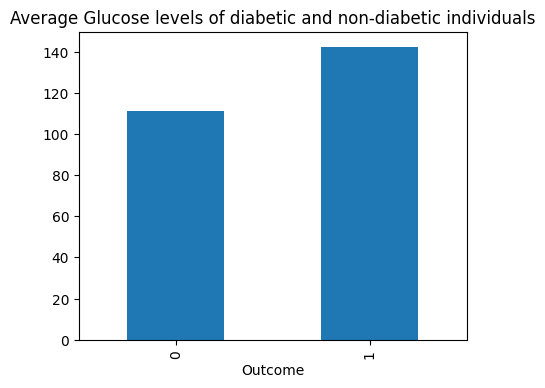

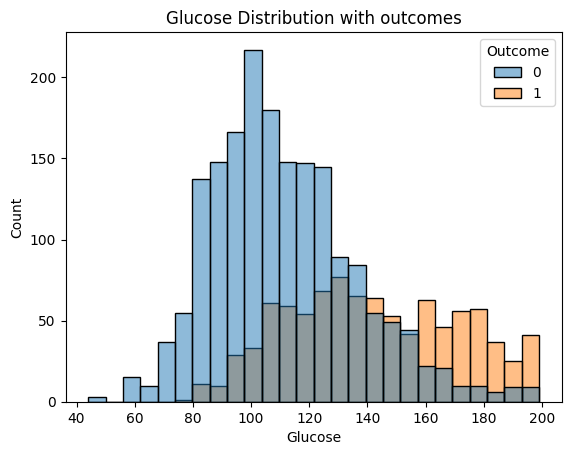

In [ ]:
#Exploring the glucose levels further
plt.figure(figsize=(5,4))
glucose_avg = df_data.groupby('Outcome')['Glucose'].mean().plot(kind='bar')
plt.title('Average Glucose levels of diabetic and non-diabetic individuals')
plt.show()

sns.histplot(data=df_data, x="Glucose", color='b', edgecolor='black', hue='Outcome')
plt.xlabel("Glucose")
plt.ylabel("Count")
plt.title("Glucose Distribution with outcomes")
plt.show()

**Observation from Glucose Distribution** : A slight difference in the propensity to be in non-diabetic and diabetic states may be seen from the bar plot. By comparing outcomes labelled as "0" with outcomes labelled as "1," the histplot shows that the average of the former is pushed to the right. According to this, there is often a higher risk of diabetes associated with higher blood sugar levels, but lower blood sugar does not.


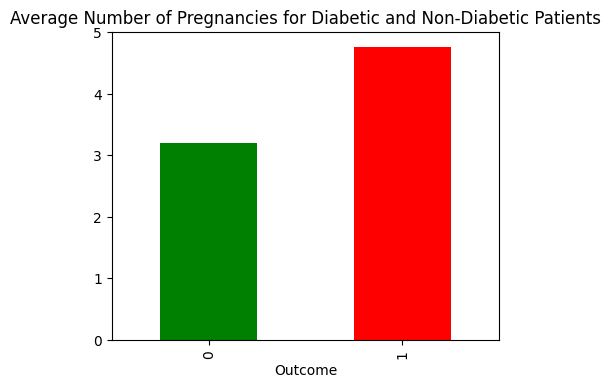

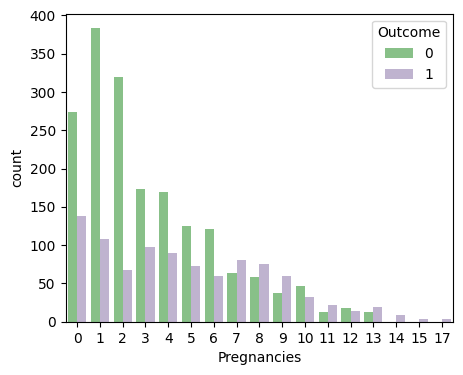

In [ ]:
# Exploring the pregnancies feature further
# Displaying the typical number of pregnancies among people with and without diabetes
plt.figure(figsize=(5,4))
average_pregnancies = df_data.groupby('Outcome')['Pregnancies'].mean()
average_pregnancies.plot(kind='bar', color=['green', 'red'])
plt.title('Average Number of Pregnancies for Diabetic and Non-Diabetic Patients')
plt.show()

# Charting the proportion of individuals with and without diabetes for each pregnancy number
plt.figure(figsize=(5,4))
sns.countplot(x='Pregnancies', hue ='Outcome', data=df_data, palette='Accent')
plt.show()

**Observation from number of pregnancies distribution** : According to this observation, the average number of pregnancies among people with diabetes is significantly higher than that of people without diabetes. Its possible function in diabetes management is shown by the notable difference in average pregnancies. Additionally, the data that has been plotted shows a correlation between the number of pregnancies and the chance of having diabetes. This correlation is especially evident after the seventh pregnancy.


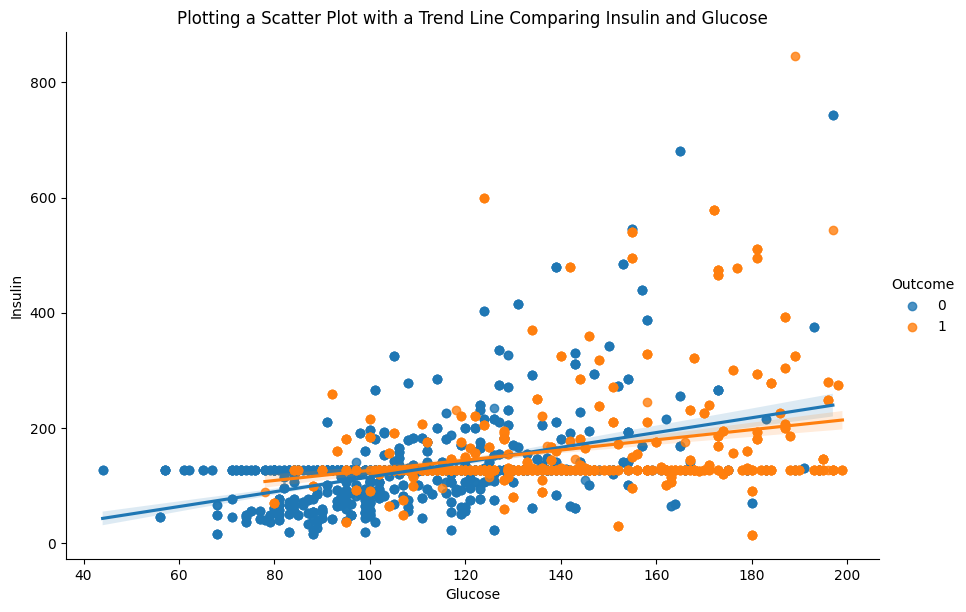

In [ ]:
#Does the presence of insulin correlate with glucose levels?

sns.lmplot(x='Glucose', y='Insulin', hue='Outcome', data=df_data, height=6, aspect=1.5)
plt.title('Plotting a Scatter Plot with a Trend Line Comparing Insulin and Glucose')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.show()

**Observation from comparing Insulin to Glucose** : The trend line with a positive slope, which indicates that insulin increases as glucose increases, is readily visible in this plot. With a few notable exceptions, the orange points on the plot indicate a higher tendency towards diabetes due to higher levels of insulin and glucose, while the blue points indicate a lower tendency towards diabetes due to lower levels of insulin and glucose. This led me to conclude that if someone's blood sugar levels rise, their insulin production will rise as well, increasing their risk of developing diabetes.


<ipython-input-163-0b02dc533b53>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pregnancies', y='Outcome', data=df_data, estimator='mean', palette='Reds')


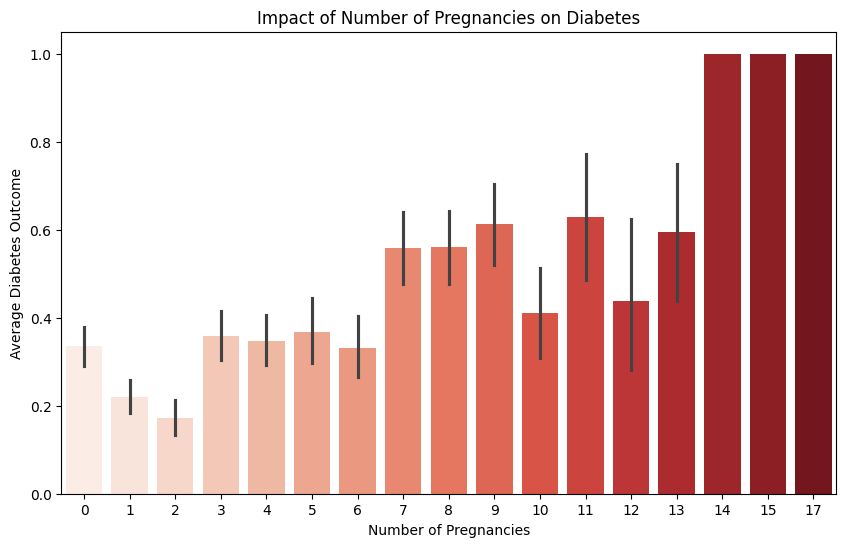

In [ ]:
#Is there a substantial correlation between the number of pregnancies and the risk of diabetes?
#The mean gestations of the patients with and without diabetes differed significantly, as I saw above. Diabetes patients had over 60% more pregnancies on average than non-diabetics.
#Thus, I deduced that having fewer pregnancies will undoubtedly aid in the management of diabetes and help prevent it.
plt.figure(figsize=(10, 6))
sns.barplot(x='Pregnancies', y='Outcome', data=df_data, estimator='mean', palette='Reds')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Average Diabetes Outcome')
plt.title('Impact of Number of Pregnancies on Diabetes')
plt.show()

**Observation from barplot showing substantial correlation between the number of pregnancies and the risk of diabetes** : I discovered that the likelihood of a woman experiencing diabetes increased with the number of pregnancies. As previously said, it has been determined that the number 6 represents the barrier, beyond which the risk of developing diabetes rises by more than 50%.



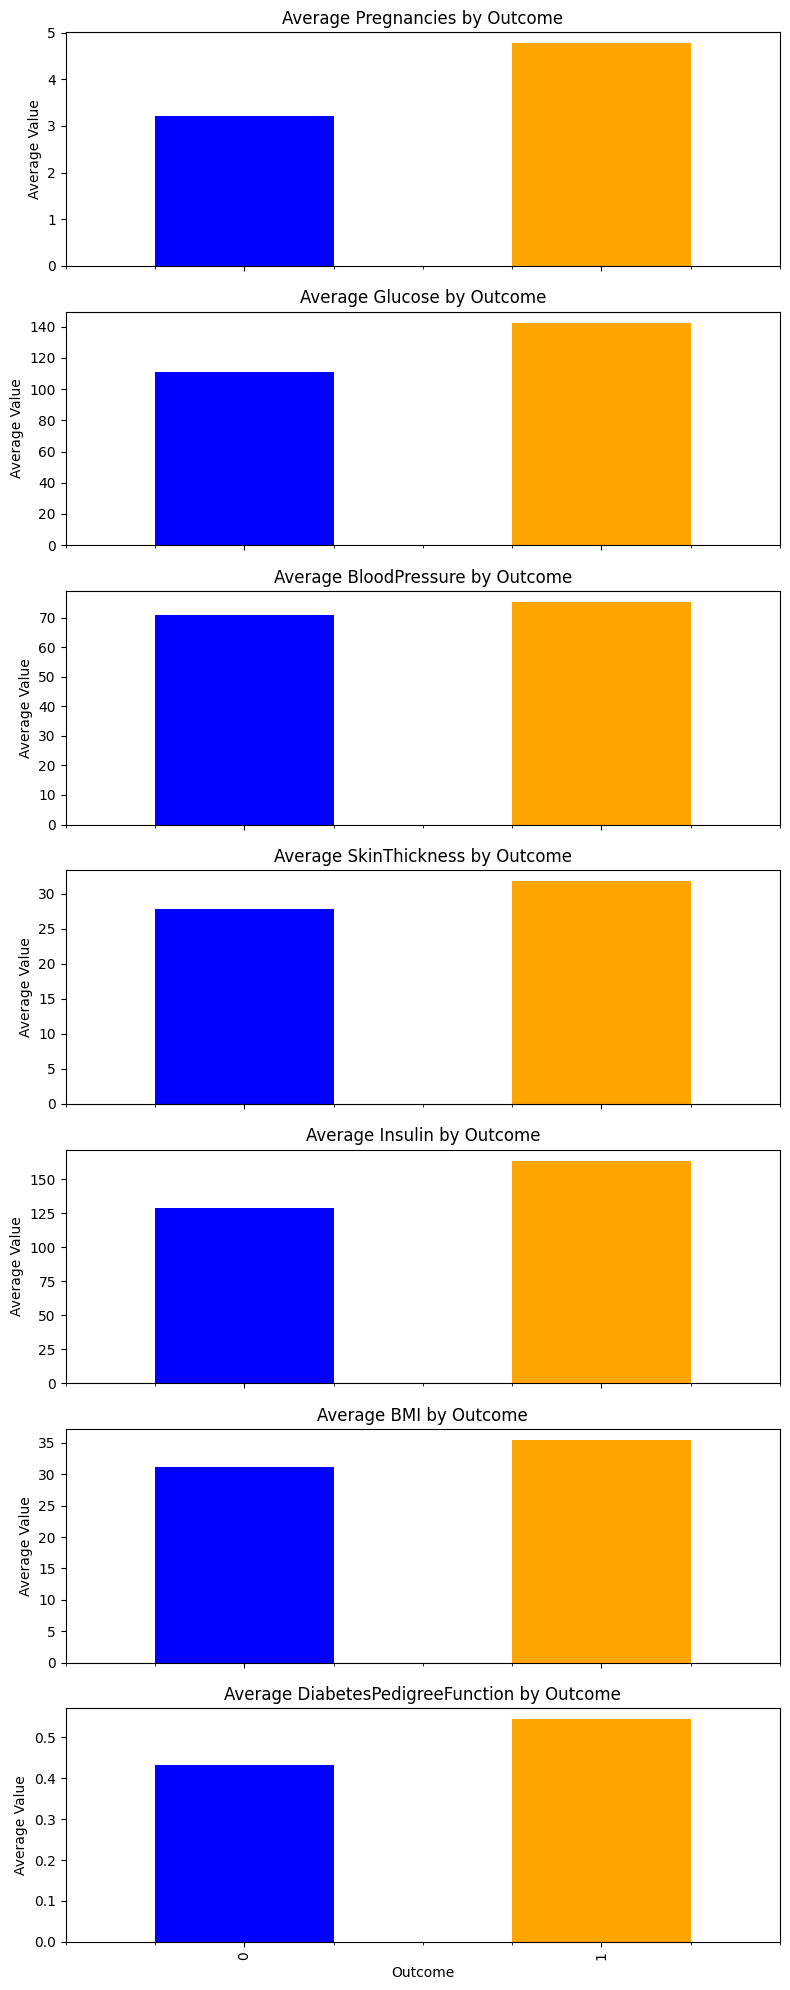

In [ ]:
#Can I discover some recommendations that could prevent people from developing diabetes?

# Define numeric columns of interest
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

# Create a subplot grid with shared x-axis
fig, axes = plt.subplots(len(numeric_columns), 1, figsize=(8,20), sharex=True)

# Iterate through numeric columns and plot bar charts for average values by outcome
for i, col in enumerate(numeric_columns):
    df_data.groupby('Outcome')[col].mean().plot(kind='bar', ax=axes[i], color=['blue', 'orange'])
    axes[i].set_title(f'Average {col} by Outcome')
    axes[i].set_ylabel('Average Value')

# Set common x-axis label
axes[-1].set_xlabel('Outcome')

plt.tight_layout()
plt.show()


**Observation from the subplot grid and recommendations for diabetes prevention** : It is clear from the subplot grid visual analysis that diabetes individuals constantly have higher averages; the biggest differences are seen in pregnancy, glucose, and insulin levels. In order to address this issue, I suggest doing routine screens for these parameters, especially for those with readings that are higher than usual, and getting medical advice to bring these values down to ranges that are not associated with diabetes. Keeping these vital indicators below the mean range may make a big difference in diabetes prevention efforts.


# **Task 2.3 – Prediction and data modelling**

Note that our ID has been removed so,We will be removing all unwanted columns which are 'BloodPressure', 'SkinThickness','Insulin', 'DiabetesPedigreeFunction'. 'Age' will also be removed because its a qualitative attribute and wont really be needed in our data modelling

In [ ]:
df_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,126.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,126.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,126.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
    df_data = df_data.drop(['BloodPressure', 'SkinThickness','Insulin', 'DiabetesPedigreeFunction', 'Age'], axis =1)
    df_data.head()

,Pregnancies,Glucose,BMI,Outcome
0,6,148.0,33.6,1
1,1,85.0,26.6,0
2,8,183.0,23.3,1
3,1,89.0,28.1,0
4,0,137.0,43.1,1


In [ ]:
df_data.describe

<bound method NDFrame.describe of       Pregnancies  Glucose   BMI  Outcome
0               6    148.0  33.6        1
1               1     85.0  26.6        0
2               8    183.0  23.3        1
3               1     89.0  28.1        0
4               0    137.0  43.1        1
...           ...      ...   ...      ...
2763            2     75.0  29.7        0
2764            8    179.0  32.7        1
2765            6     85.0  31.2        0
2766            0    129.0  67.1        1
2767            2     81.0  30.1        0

[2768 rows x 4 columns]>

**Based on the kind of data, we will need classification models to predict and test these relationships with the outcome.**

# Using Bernoulli Naive Bayes

In [ ]:
#using Bayes Method. we will define our outcome to be y variable and attributes to be x variable. The modeling of x variable will determin the y outcome.
y_outcome = df_data["Outcome"]
y_outcome.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [ ]:
x_data = df_data.copy()
x_data= x_data.drop(columns =['Outcome'])
x_data.head()

,Pregnancies,Glucose,BMI
0,6,148.0,33.6
1,1,85.0,26.6
2,8,183.0,23.3
3,1,89.0,28.1
4,0,137.0,43.1


In [ ]:
#taking 80 percent of the data as training data and 20 percent of the data as test data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_outcome, test_size = 0.20, stratify = y_outcome, random_state = 0)
print("The X train data shape: ",x_train.shape)
print("The X test data shape: ",x_test.shape)
print("The Y train data shape: ",y_train.shape)
print("The Y test data shape: ",y_test.shape)

The X train data shape:  (2214, 3)
The X test data shape:  (554, 3)
The Y train data shape:  (2214,)
The Y test data shape:  (554,)


In [ ]:
bayes = BernoulliNB(binarize=0.0)
b_model = bayes.fit(x_train, y_train)
b_model

BernoulliNB()

In [ ]:
prediction = b_model.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#Now, Let know how accurate our prediction is against the x_test outcome
Accuracy = accuracy_score(y_test, prediction)
F1_Score= f1_score(y_test, prediction)
Precision =  precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)

print ("Accuracy: ",round(Accuracy,3))
print ("F1_Score: ",round(F1_Score,3))
print ("Precision: ",round(Precision,3))
print ("recall: ",round(recall,3))

Accuracy:  0.655
F1_Score:  0.0
Precision:  0.0
recall:  0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Classification report
cr = classification_report(y_test,prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.66      1.00      0.79       363
           1       0.00      0.00      0.00       191

    accuracy                           0.66       554
   macro avg       0.33      0.50      0.40       554
weighted avg       0.43      0.66      0.52       554



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Using Random Forest Model(RFM)

**We need to define our hyperparameters**

In [ ]:
Rfm_param = {
    'n_estimators' : [20, 40, 60, 80, 100],
    'max_depth' : [8,10,14,20],
    'max_features' : ['sqrt'],
    'min_samples_leaf' : [0.25, 0.5, 1],
    'min_samples_split' : [0.001, 0.01, 0.05],
    'max_samples' : [.5, .9]
}



In [ ]:
x_rfm_train, x_rfm_value, y_rfm_train, y_rfm_value = train_test_split(x_train, y_train, stratify = y_train, random_state = 0, test_size = 0.20)
split_value = [0 if x in x_rfm_value.index else -1 for x in x_train.index]
predefined_split = PredefinedSplit(split_value)
clfs = RandomForestClassifier(random_state = 0)
rfm = GridSearchCV(clfs, Rfm_param, cv = predefined_split,verbose = 1,  n_jobs = -1,refit = 'f1')
rfm.fit(x_train, y_train)


Fitting 1 folds for each of 360 candidates, totalling 360 fits


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ..., -1, -1])),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 14, 20], 'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.9],
                         'min_samples_leaf': [0.25, 0.5, 1],
                         'min_samples_split': [0.001, 0.01, 0.05],
                         'n_estimators': [20, 40, 60, 80, 100]},
             refit='f1', verbose=1)

In [ ]:
#getting best parameter to use.
rfm.best_params_

{'max_depth': 14,
 'max_features': 'sqrt',
 'max_samples': 0.9,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 20}

In [ ]:
rfm_best_param = RandomForestClassifier(n_estimators = 80, max_depth = 20, max_features = 'sqrt', max_samples = 0.9, min_samples_leaf = 1,min_samples_split = 0.001, random_state = 0)
rfm_best_param.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_samples=0.9, min_samples_split=0.001,
                       n_estimators=80, random_state=0)

In [ ]:
rfm_y_predict = rfm_best_param.predict(x_test)
rfm_y_predict

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,

In [ ]:
Accuracy = accuracy_score(y_test, rfm_y_predict)
F1_Score= f1_score(y_test, rfm_y_predict)
Precision =  precision_score(y_test, rfm_y_predict)
recall = recall_score(y_test, rfm_y_predict)

print ("Accuracy: ",round(Accuracy,3))
print ("F1_Score: ",round(F1_Score,3))
print ("Precision: ",round(Precision,3))
print ("recall: ",round(recall,3))

Accuracy:  0.993
F1_Score:  0.99
Precision:  0.99
recall:  0.99


# **Conclusion**

The study utilised exploratory analysis, outlier identification, and data cleaning approaches to investigate the correlation between different features and the result. For prediction, two machine learning algorithms were used: Bernoulli Naive Bayes and Random Forest. With an astounding accuracy rate of 99.3%, Random Forest outperformed Bernoulli Naive Bayes, which produced a lesser accuracy of 65.5%. These results suggest that Random Forest could be a useful tool for early identification and accurate diabetes prediction in healthcare settings. This emphasises how important it is to use machine learning techniques in conjunction with predictive analytics to improve healthcare outcomes.
